## Seattle Airbnb Open Data

This notebook shows the data analysis process of the [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data). It contains 3 parts:

* General overview
* Questions & answers
* Conclusion

This is a project of Udacity DSND course.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

### General over view

##### Business understanding

It is very interesting to study this dataset, as we frequently face the problem : how to rent a house/apartment. For individuals like me, understanding the renting market helps to make good decisions, for the hosts or business organizations, understanding the renting market helps to profit and provide better service.

##### Data understanding

To understand the data, I printed out some useful output of the dataframes in the following study.

##### prepare the data

The data has already been gathered by Kaggle. The assessment and cleaning is in the following.

* Data gathering

    First things first, getting to know the data.The data is provided by Kaggle.

In [2]:
!ls data

calendar.csv
listings.csv
reviews.csv


In [2]:
df_cal = pd.read_csv('data/calendar.csv')
df_lst = pd.read_csv('data/listings.csv')
df_rev = pd.read_csv('data/reviews.csv')

# make copy
cal = df_cal.copy()
lst = df_lst.copy()
rev = df_rev.copy()

* Data assessment (cal)
    * `available` should be bool.
    * `price` should be float, and the dollar sign should be removed.

In [4]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
cal.listing_id.value_counts().shape

(3818,)

In [6]:
cal.date.value_counts().value_counts()

3818    365
Name: date, dtype: int64

In [7]:
# check all the dates involved.
for i in cal.date.value_counts().index.sort_values():
    print(i,end=' ')

2016-01-04 2016-01-05 2016-01-06 2016-01-07 2016-01-08 2016-01-09 2016-01-10 2016-01-11 2016-01-12 2016-01-13 2016-01-14 2016-01-15 2016-01-16 2016-01-17 2016-01-18 2016-01-19 2016-01-20 2016-01-21 2016-01-22 2016-01-23 2016-01-24 2016-01-25 2016-01-26 2016-01-27 2016-01-28 2016-01-29 2016-01-30 2016-01-31 2016-02-01 2016-02-02 2016-02-03 2016-02-04 2016-02-05 2016-02-06 2016-02-07 2016-02-08 2016-02-09 2016-02-10 2016-02-11 2016-02-12 2016-02-13 2016-02-14 2016-02-15 2016-02-16 2016-02-17 2016-02-18 2016-02-19 2016-02-20 2016-02-21 2016-02-22 2016-02-23 2016-02-24 2016-02-25 2016-02-26 2016-02-27 2016-02-28 2016-02-29 2016-03-01 2016-03-02 2016-03-03 2016-03-04 2016-03-05 2016-03-06 2016-03-07 2016-03-08 2016-03-09 2016-03-10 2016-03-11 2016-03-12 2016-03-13 2016-03-14 2016-03-15 2016-03-16 2016-03-17 2016-03-18 2016-03-19 2016-03-20 2016-03-21 2016-03-22 2016-03-23 2016-03-24 2016-03-25 2016-03-26 2016-03-27 2016-03-28 2016-03-29 2016-03-30 2016-03-31 2016-04-01 2016-04-02 2016-04-03

cal describes availability of the `listing_ids` on a daily basis, price is provided if available. In total, there are 3818 different `listing_ids`, covering the period of about one whole year from 2016-01-04 to 2017-01-02 for every `listing_ids`.

* Data assessment (lst)
    * NaN values are loaded as string, needs to be converted to np.nan.
    * some columns have a lot of missing values, needs to be dropped or use with caution.

In [8]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
print(list(lst))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

In [10]:
# check the shape of lst dataframe
lst.shape

(3818, 92)

In [11]:
# found out that this is a not very useful column
lst.last_scraped.value_counts()

2016-01-04    3818
Name: last_scraped, dtype: int64

In [12]:
# check missing values, avoid using values containing too many missing values.
# set the missing or unknown values to nan
check_list = ['NaN',]

def check_nan(x,check_list):
    """
    the function to be applied to check NaN values.
    it is possible to define specific patterns of missing values for a certain feature.
    """
    nans = []
    for val in check_list:
        nans.append(x==val)
    return any(nans)

# experiences_offered column, none is not NaN, it should be set to str
# this is not that useful here in our analysis
# lst.experiences_offered = lst.experiences_offered.astype('str')


# checking NaN values in each column
# then print out the column name and number of unique values
for i,feature in enumerate(lst.columns): # loop over all the features
    nan_list = lst[feature].astype(str).apply(check_nan,check_list=check_list)
    lst[feature][nan_list] = np.nan # set missing values to np.nan
    print(feature,lst[feature].value_counts().index.nunique())

c:\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


id 3818
listing_url 3818
scrape_id 1
last_scraped 1
name 3792
summary 3478
space 3119
description 3742
experiences_offered 1
neighborhood_overview 2506
notes 1999
transit 2574
thumbnail_url 3498
medium_url 3498
picture_url 3818
xl_picture_url 3498
host_id 2751
host_url 2751
host_name 1466
host_since 1380
host_location 120
host_about 2011
host_response_time 4
host_response_rate 45
host_acceptance_rate 2
host_is_superhost 2
host_thumbnail_url 2743
host_picture_url 2743
host_neighbourhood 102
host_listings_count 27
host_total_listings_count 27
host_verifications 116
host_has_profile_pic 2
host_identity_verified 2
street 1442
neighbourhood 81
neighbourhood_cleansed 87
neighbourhood_group_cleansed 17
city 7
state 2
zipcode 28
market 1
smart_location 7
country_code 1
country 1
latitude 3818
longitude 3818
is_location_exact 2
property_type 16
room_type 3
accommodates 15
bathrooms 12
bedrooms 8
beds 11
bed_type 5
amenities 3284
square_feet 47
price 273
weekly_price 395
monthly_price 356
securi

> There are a lot of missing values, but those columns are not that useful in this project. So I simply ignore them.

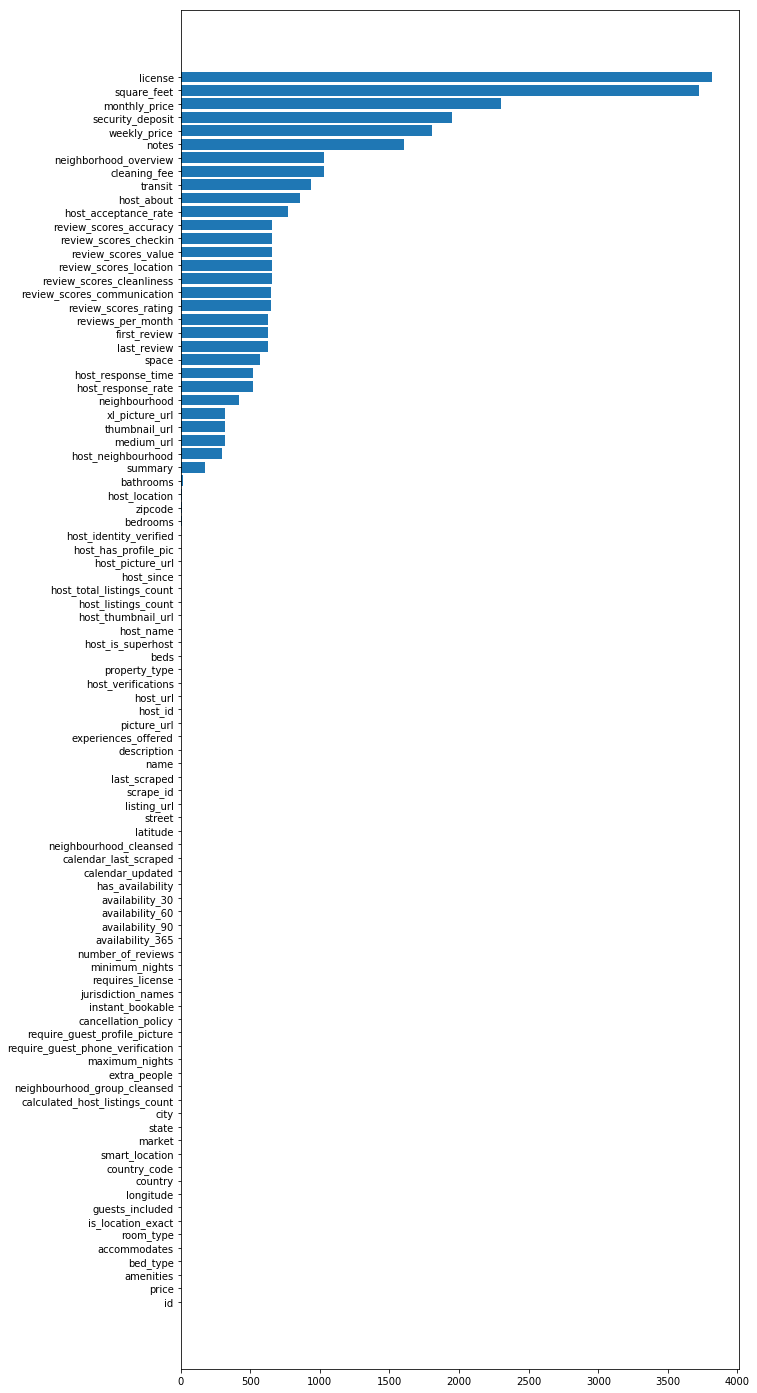

In [13]:
num_nans  = pd.DataFrame(lst.isnull().sum(),columns=['n_nans',])
num_nans = num_nans.sort_values(by='n_nans')
plt.figure(figsize=(10,25))
plt.barh(range(len(num_nans)),num_nans.n_nans.tolist())
t = plt.yticks(range(len(num_nans)),num_nans.index.tolist())

lst contains 92 columns, giving rich infomation of every `id`.

* Data assessment (rev)

    It is clean, no need to be cleaned for the moment.

In [14]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [15]:
rev.shape

(84849, 6)

In [16]:
rev.reviewer_id.nunique()

75730

In [17]:
# check all the review date
for i in rev.date.value_counts().index.sort_values():
    print(i,end=' ')

2009-06-07 2009-06-28 2009-07-17 2009-08-31 2009-09-10 2009-10-02 2009-10-04 2009-10-09 2009-10-19 2009-10-24 2009-10-27 2009-11-03 2009-11-10 2009-11-23 2009-11-25 2009-11-28 2010-01-14 2010-01-27 2010-01-31 2010-02-07 2010-02-13 2010-02-21 2010-03-16 2010-03-21 2010-03-23 2010-03-25 2010-03-28 2010-03-31 2010-04-04 2010-04-11 2010-04-15 2010-04-19 2010-04-23 2010-05-01 2010-05-02 2010-05-03 2010-05-08 2010-05-12 2010-05-13 2010-05-20 2010-05-24 2010-05-29 2010-05-30 2010-06-03 2010-06-04 2010-06-06 2010-06-08 2010-06-10 2010-06-13 2010-06-15 2010-06-18 2010-06-21 2010-06-22 2010-06-25 2010-06-28 2010-06-29 2010-06-30 2010-07-02 2010-07-03 2010-07-04 2010-07-05 2010-07-08 2010-07-09 2010-07-10 2010-07-12 2010-07-13 2010-07-14 2010-07-15 2010-07-16 2010-07-22 2010-07-25 2010-07-28 2010-07-30 2010-07-31 2010-08-01 2010-08-02 2010-08-04 2010-08-06 2010-08-07 2010-08-08 2010-08-09 2010-08-11 2010-08-13 2010-08-14 2010-08-15 2010-08-16 2010-08-18 2010-08-19 2010-08-20 2010-08-21 2010-08-23

 2012-09-28 2012-09-29 2012-09-30 2012-10-01 2012-10-02 2012-10-03 2012-10-04 2012-10-05 2012-10-06 2012-10-07 2012-10-08 2012-10-09 2012-10-10 2012-10-11 2012-10-12 2012-10-13 2012-10-14 2012-10-15 2012-10-16 2012-10-17 2012-10-18 2012-10-19 2012-10-20 2012-10-21 2012-10-22 2012-10-23 2012-10-24 2012-10-25 2012-10-26 2012-10-27 2012-10-28 2012-10-29 2012-10-30 2012-10-31 2012-11-01 2012-11-02 2012-11-03 2012-11-04 2012-11-05 2012-11-07 2012-11-08 2012-11-09 2012-11-10 2012-11-11 2012-11-12 2012-11-13 2012-11-14 2012-11-15 2012-11-16 2012-11-17 2012-11-18 2012-11-19 2012-11-20 2012-11-21 2012-11-22 2012-11-23 2012-11-24 2012-11-25 2012-11-26 2012-11-27 2012-11-28 2012-11-29 2012-11-30 2012-12-01 2012-12-02 2012-12-03 2012-12-04 2012-12-05 2012-12-06 2012-12-08 2012-12-09 2012-12-11 2012-12-12 2012-12-13 2012-12-14 2012-12-15 2012-12-16 2012-12-17 2012-12-18 2012-12-19 2012-12-20 2012-12-21 2012-12-22 2012-12-23 2012-12-24 2012-12-25 2012-12-26 2012-12-27 2012-12-28 2012-12-29 2012-12-3

 2015-10-23 2015-10-24 2015-10-25 2015-10-26 2015-10-27 2015-10-28 2015-10-29 2015-10-30 2015-10-31 2015-11-01 2015-11-02 2015-11-03 2015-11-04 2015-11-05 2015-11-06 2015-11-07 2015-11-08 2015-11-09 2015-11-10 2015-11-11 2015-11-12 2015-11-13 2015-11-14 2015-11-15 2015-11-16 2015-11-17 2015-11-18 2015-11-19 2015-11-20 2015-11-21 2015-11-22 2015-11-23 2015-11-24 2015-11-25 2015-11-26 2015-11-27 2015-11-28 2015-11-29 2015-11-30 2015-12-01 2015-12-02 2015-12-03 2015-12-04 2015-12-05 2015-12-06 2015-12-07 2015-12-08 2015-12-09 2015-12-10 2015-12-11 2015-12-12 2015-12-13 2015-12-14 2015-12-15 2015-12-16 2015-12-17 2015-12-18 2015-12-19 2015-12-20 2015-12-21 2015-12-22 2015-12-23 2015-12-24 2015-12-25 2015-12-26 2015-12-27 2015-12-28 2015-12-29 2015-12-30 2015-12-31 2016-01-01 2016-01-02 2016-01-03 

rev contains 84849 entries of comments made between 2009-06-07 and 2016-01-03.

### Questions & answers

Q1: What is the trend of actually paid price over this full period? 

In [18]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


* Data cleaning
    * the `price` column, omit the dollar sign, and change to float type.
    * change `available` to bool.
    * check again all the unavailable entries are priced and the available entries are marked with `NaN` price.
    * fill in the missing values of `price` according to the strategy described in the corresponding code cell.

In [19]:
# change to datetime data format
cal.date = pd.to_datetime(cal.date,infer_datetime_format=True)

# omit the dollar sign
def omit_dollar(x):
    if x[0]=='$':
        return x[1:].replace(',','')
    return x
cal.price = cal.price.astype('str').apply(omit_dollar)
cal.price = cal.price.astype('float')

In [20]:
cal.available = cal.available == 't'

In [21]:
# if it is not available, it does not have a price
cal[cal.available==False].price.value_counts(dropna = False)

NaN    459028
Name: price, dtype: int64

In [22]:
for i in cal[cal.available].price.value_counts(dropna = False).index:
    print(i,end=' ')

150.0 100.0 75.0 125.0 65.0 90.0 95.0 99.0 85.0 80.0 110.0 120.0 70.0 60.0 175.0 250.0 55.0 200.0 50.0 115.0 40.0 69.0 135.0 105.0 130.0 89.0 79.0 225.0 45.0 129.0 49.0 109.0 119.0 140.0 149.0 59.0 145.0 195.0 160.0 300.0 139.0 165.0 350.0 155.0 68.0 275.0 180.0 42.0 39.0 199.0 88.0 170.0 169.0 78.0 35.0 58.0 97.0 185.0 189.0 400.0 325.0 249.0 82.0 220.0 98.0 62.0 159.0 72.0 450.0 52.0 375.0 30.0 210.0 138.0 190.0 179.0 126.0 245.0 87.0 51.0 92.0 54.0 235.0 48.0 295.0 84.0 74.0 700.0 53.0 66.0 104.0 219.0 93.0 57.0 67.0 240.0 47.0 280.0 29.0 260.0 63.0 118.0 550.0 117.0 265.0 46.0 500.0 209.0 215.0 122.0 114.0 25.0 38.0 43.0 229.0 103.0 239.0 124.0 96.0 168.0 41.0 81.0 230.0 64.0 94.0 285.0 77.0 600.0 132.0 279.0 44.0 395.0 148.0 91.0 86.0 259.0 174.0 399.0 83.0 299.0 111.0 112.0 153.0 134.0 137.0 218.0 194.0 144.0 73.0 102.0 164.0 320.0 335.0 76.0 158.0 37.0 56.0 205.0 108.0 475.0 290.0 147.0 269.0 425.0 128.0 127.0 270.0 495.0 136.0 152.0 31.0 156.0 183.0 178.0 101.0 198.0 154.0 204.

In [29]:
def get_price(df):
    """
    we assume:
    1. when it is not available, it is rented.
    2. the paid price is the same as posted on the last day before it become unavailable.
    3. if it is unavailable from the beginning, then it is ignored until it become available and a price is posted.
    """
    for idx in tqdm(range(len(df))):
        row = df.iloc[idx,:]
        if row.available:
            continue
        last_day = row.date- pd.Timedelta(days=1)
        if last_day < pd.to_datetime('20160104', format='%Y%m%d', errors='ignore'):
            continue
        last_day_price = df[df.listing_id==row.listing_id][df.date==last_day].price
        df.set_value(idx,'price',last_day_price)
    return df

cal = get_price(cal)

c:\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
c:\python36\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


* Data analyze, Model, Visualization

    Group the entries by `date`, and calculate the mean value, then plot it out.

c:\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


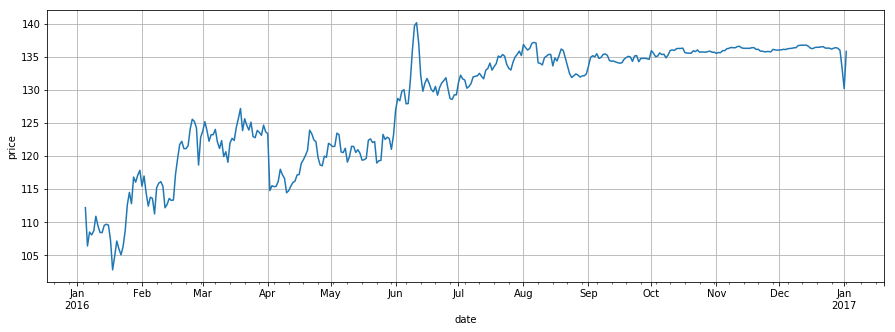

In [62]:
plt.figure(figsize=(15,5))
cal[cal.available==False].groupby('date').mean().price.plot()
plt.ylabel('price')
plt.grid('on')
plt.savefig('paidpricetrend.png')

The average paid price has increase from around 110 dollars to about 136 dollars this year, there are ups and downs of the actually paid price in the first half year, but it become relatively stable and stayed at a high level after September.

Q2: What are the words the hosts and the guests would like to use to describe their houses?

* Data cleaning, Data analyze, Model
    
    This part does not need to include these 3 steps.

In [46]:
# a brief look at the first 5 descriptions
for i in lst.description.head():
    print(i)

Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill.   This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV,  DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo.    The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no

In [48]:
with open('descriptions.txt','w',encoding='utf-8') as f:
    f.writelines(lst.description)

In [53]:
from wordcloud import WordCloud
with open('descriptions.txt','r',encoding='utf-8') as f:
    data = f.readlines()

wc = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(str(data))

* Visualization

    The two word cloud plots.

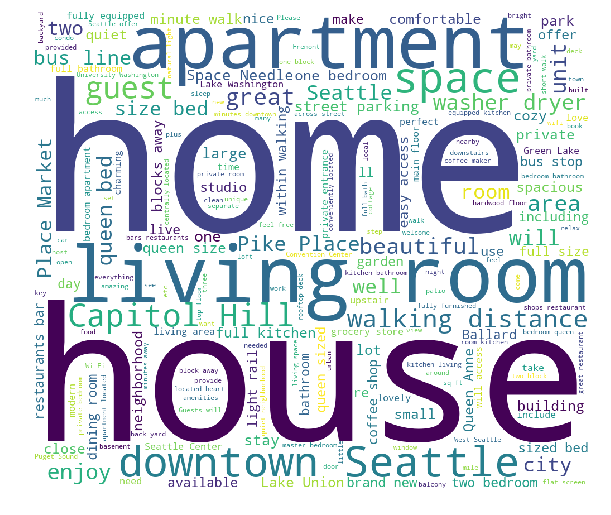

In [55]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('description.png')

From this plot, home and house are the biggest, people say a lot of things like "make yourself at home". We can also see that a lot of hosts would like to emphasize on the convience of the location, like downtown, walking distance,seattle city. Apart from that, the hosts would also like to mention that they have big size bed, and equiped with a lot other amenities.

In [58]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [59]:
# same as above
with open('comments.txt','w',encoding='utf-8') as f:
    f.writelines(rev.comments.astype('str'))

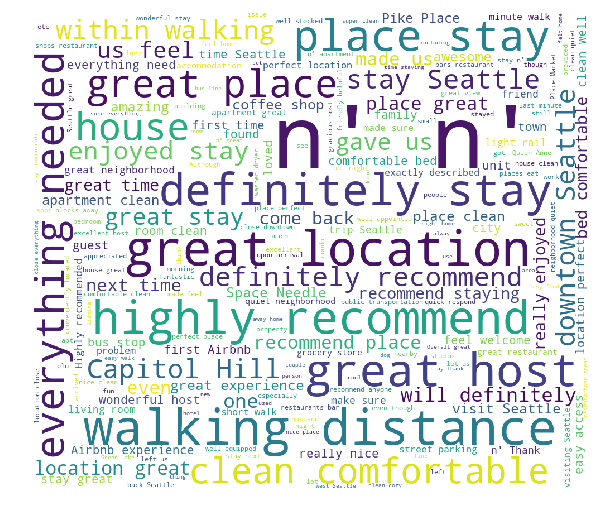

In [60]:
with open('comments.txt','r',encoding='utf-8') as f:
    data = f.readlines()

wc = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(str(data))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('comments.png')

From this plot, we can see that absolute most are positive comments.

From the plots above, we see that both the hosts and the guests care a lot about locations. A simple guess is that location has a very strong relation with price.

Q3: How price is related with location?

Related variables are listed below:

In [67]:
lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [3]:
# I listed the location related features here. To simplify, I finally chose neighbourhood_group_cleansed
features = ['street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode']
lst['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

* Data cleaning
    * omit the dollar sign and change to float.
    * subset useful columns.

##### Data modeling

* Data analyze, Model
    * group by `neighbourhood_group_cleansed` and calculate the mean value of price in each group.

In [5]:
lst.price = lst.price.astype('str').apply(omit_dollar).astype('float')
lst.price.head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [6]:
lst_q3 = lst[['neighbourhood_group_cleansed','price']]
lst_q3 = lst_q3.groupby('neighbourhood_group_cleansed').mean()
lst_q3

,price
neighbourhood_group_cleansed,
Ballard,124.682609
Beacon Hill,94.669492
Capitol Hill,130.592593
Cascade,140.101124
Central Area,128.338753
Delridge,83.278481
Downtown,154.405660
Interbay,109.727273
Lake City,92.671642


* Visualization
    * sort by price and plot using barh plot.

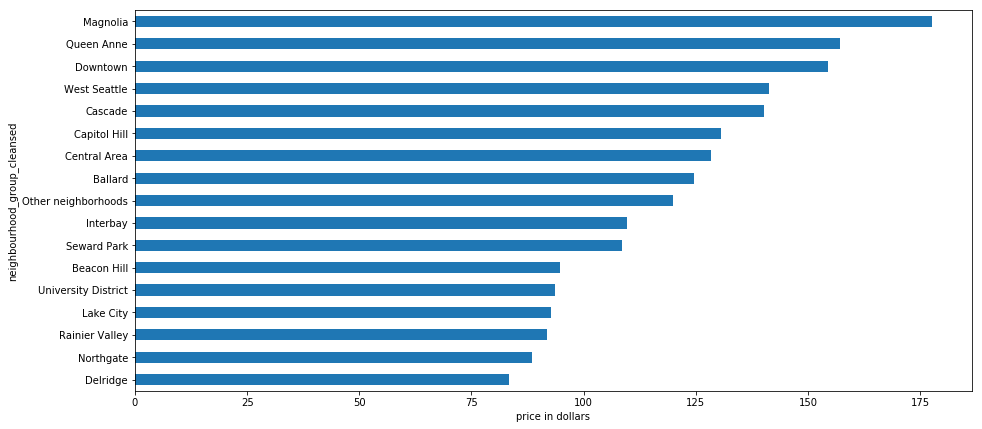

In [16]:
lst_q3.sort_values(by='price').plot(kind='barh',figsize=(15,7),legend=None)
plt.xlabel('price in dollars')
plt.savefig('pricelocation.png')

It seems that my intuition is true, the location is strongly related to the price.

### Conclusion

##### evaluate the results

I studied the Seattle Airbnb Open Data by asking and answering 3 questions. In the year 2016, the actually paid price has gone up, both the hosts and the guests care very much about the location, and naturally, the location has a very strong relation with the price.